__Problem 1__

This code generates all possible combinations of alternate alleles for two genomic sites, calculates the sum of alternate alleles for each combination, and then computes and displays the probability mass function (PMF) for the total number of alternate alleles.

In [1]:
# Define the sample space for a single site (0, 1, or 2 alternate alleles)
single_site_alleles <- 0:2

# Calculate the sample space for two sites by considering all possible combinations
sample_space <- expand.grid(site1 = single_site_alleles, site2 = single_site_alleles)

# Define the random variable G as the sum of alternate alleles over two sites
sample_space$G <- rowSums(sample_space)

# Calculate the probability mass function (PMF) of G
pmf <- table(sample_space$G) / nrow(sample_space)

# Display the PMF
pmf


        0         1         2         3         4 
0.1111111 0.2222222 0.3333333 0.2222222 0.1111111 

__Problem 1.2__

The code creates a bar plot to visualize the Probability Mass Function (PMF) and a step plot to display the Cumulative Distribution Function (CDF) of the sum of alternate alleles across two genomic sites.

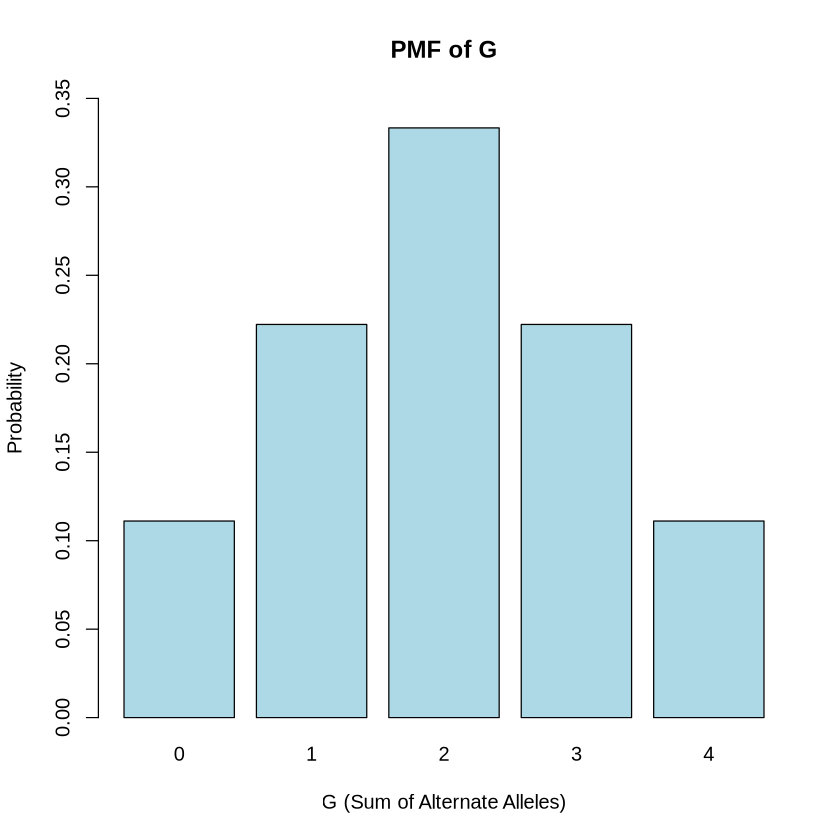

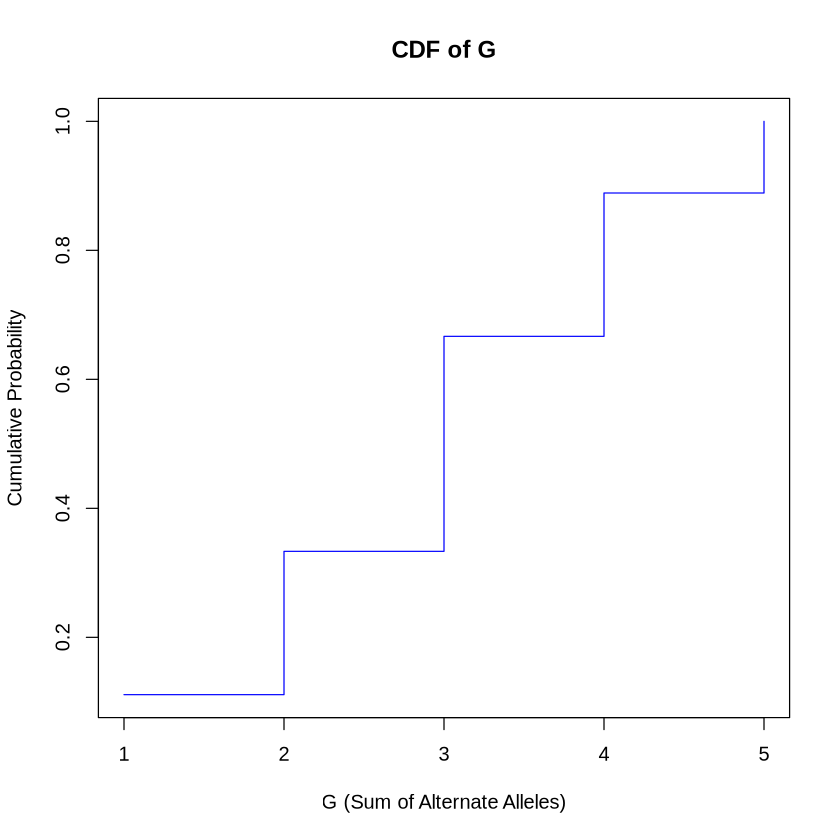

In [2]:
# Plot the Probability Mass Function (PMF)
barplot(pmf, names.arg = 0:4, col = "lightblue", main = "PMF of G",
        xlab = "G (Sum of Alternate Alleles)", ylab = "Probability", ylim = c(0, 0.35))

# Plot the Cumulative Distribution Function (CDF)
plot(cumsum(pmf), type = "s", col = "blue", main = "CDF of G",
     xlab = "G (Sum of Alternate Alleles)", ylab = "Cumulative Probability")


__Problem 2__

In this code genotype data from two genomic sites for ten individuals are combined to calculate the number of alternate alleles ('1') for each individual, and the distribution is displayed with a bar chart. The key statistical metrics are calculated and printed: mean, standard deviation, and skewness of the allele distribution.

Mean:  2 
Standard Deviation:  1.154701 
Skewness:  0 


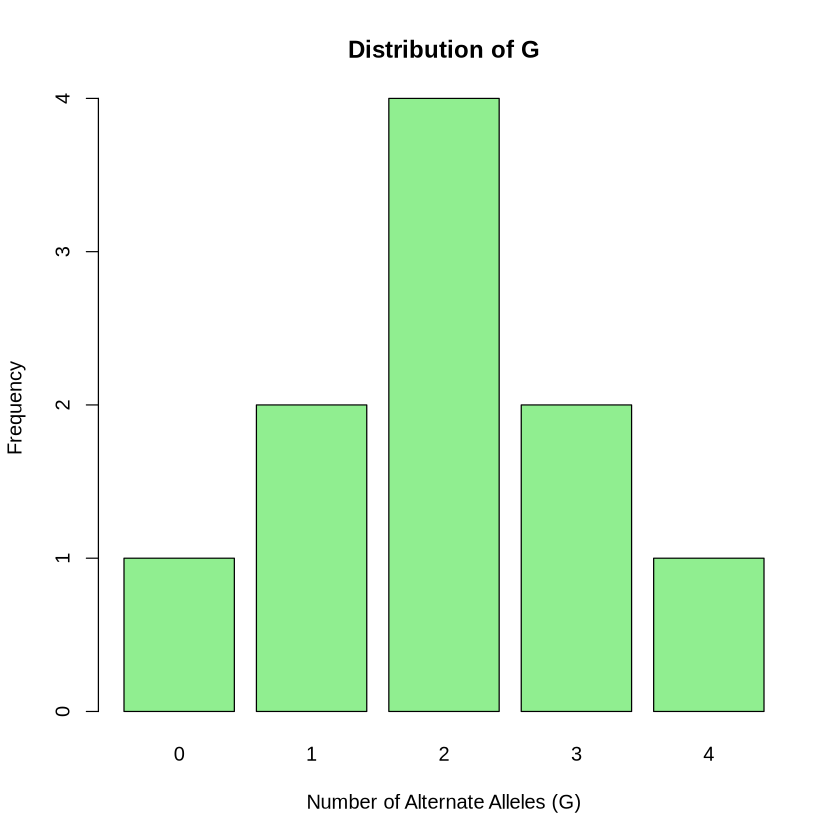

In [3]:
# Observed data for ten individuals
genotypes_first_site <- c("00", "00", "11", "01", "11", "00", "01", "00", "11", "11")
genotypes_second_site <- c("01", "01", "00", "11", "01", "00", "01", "11", "00", "11")

# Combine genotypes for both sites
combined_genotypes <- paste0(genotypes_first_site, "-", genotypes_second_site)

# Function to count the number of alternate alleles '1' in a genotype combination
count_alternate_alleles <- function(genotype) {
  sum(unlist(strsplit(genotype, "")) == "1")
}

# Calculate G for each individual
G_values <- sapply(combined_genotypes, count_alternate_alleles)

# Visualization: Bar chart of the distribution of G
barplot(table(G_values), col = "lightgreen", main = "Distribution of G",
        xlab = "Number of Alternate Alleles (G)", ylab = "Frequency")

# Function to calculate skewness
calculate_skewness <- function(x) {
  n <- length(x)
  mean_x <- mean(x)
  sd_x <- sd(x)
  skewness <- (n / ((n - 1) * (n - 2))) * sum(((x - mean_x) / sd_x)^3)
  return(skewness)
}

# Calculating the metrics
mean_G <- mean(G_values)
sd_G <- sd(G_values)
skewness_G <- calculate_skewness(G_values) # custom skewness calculation

# Output the calculated metrics without $ sign
cat("Mean: ", mean_G, "\n")
cat("Standard Deviation: ", sd_G, "\n")
cat("Skewness: ", skewness_G, "\n")

__Problem 2.2__

This code performs a t-test to compare the means of two datasets, G and G2, checks if the p-value is below a predefined significance level (0.05), and generates a report. It either rejects or fails to reject the null hypothesis, depending on whether there is a significant difference between the means of the two groups.

In [4]:
# Assuming observed_data is a data frame with a column named G
observed_data <- data.frame(G = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10))

# Define G2
G2 <- c(2, 4, 2, 3, 3, 3, 2, 3, 3, 4)

# Perform a t-test
t_test_result <- t.test(observed_data$G, G2)

# Extract p-value from the t-test result
p_value <- t_test_result$p.value

# Set significance level
alpha <- 0.05

# Define hypotheses
# Null hypothesis (H0): The means of G and G2 are equal.
# Alternative hypothesis (H1): The means of G and G2 are not equal.
# Assuming a two-tailed test.

# Report statement
report_statement <- if (p_value < alpha) {
  cat("Reject the null hypothesis. There is significant evidence that the means of G and G2 are different.\n")
} else {
  cat("Fail to reject the null hypothesis. There is not enough evidence to conclude that the means of G and G2 are different.\n")
}

# Output the t-test result and report statement
cat("t =", t_test_result$statistic, "\n")
cat("p-value =", p_value, "\n")
cat("Mean of x =", mean(observed_data$G), "\n")
cat("Mean of y =", mean(G2), "\n")
cat("Degrees of freedom =", t_test_result$parameter, "\n")
cat("95 percent confidence interval:", t_test_result$conf.int, "\n")

cat("
Task 2.2 Report Statement

Hypotheses:
- Null hypothesis (H0): The means of G and G2 are equal.
- Alternative hypothesis (H1): The means of G and G2 are not equal (two-tailed test).

Interpretation:
At a significance level of 0.05, the p-value is greater than the threshold. Therefore, we fail to reject the null hypothesis. 
There is not enough evidence to conclude that the means of G and G2 are different.")

Reject the null hypothesis. There is significant evidence that the means of G and G2 are different.
t = 2.638389 
p-value = 0.02467668 
Mean of x = 5.5 
Mean of y = 2.9 
Degrees of freedom = 10.06533 
95 percent confidence interval: 0.4062116 4.793788 

Task 2.2 Report Statement

Hypotheses:
- Null hypothesis (H0): The means of G and G2 are equal.
- Alternative hypothesis (H1): The means of G and G2 are not equal (two-tailed test).

Interpretation:
At a significance level of 0.05, the p-value is greater than the threshold. Therefore, we fail to reject the null hypothesis. 
There is not enough evidence to conclude that the means of G and G2 are different.

__Problem 3__

This code treats ancestry as a factor, and fits a general linear model to predict risk based on genotypes, ancestry, and income. It performs stepwise model selection to reduce the model based on AIC, checks the normality of residuals using the Shapiro-Wilk test, and generates plots visualizing the relationship between genotypes, ancestry, and risk. The code also assesses homoscedasticity and adds regression lines to the scatterplots.

In [ ]:
# Install packages
install.packages("tidyverse")
install.packages("MASS")

In [5]:
# Load MASS and tidyverse library
library(MASS)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Start:  AIC=877.33
risk ~ genotypes + ancestry + income

            Df Sum of Sq   RSS    AIC
- income     1       1.2 15291 875.35
<none>                   15290 877.33
- ancestry   2     866.3 16156 884.35
- genotypes  1   10210.4 25501 977.63

Step:  AIC=875.35
risk ~ genotypes + ancestry

            Df Sum of Sq   RSS    AIC
<none>                   15291 875.35
+ income     1       1.2 15290 877.33
- ancestry   2    1543.3 16835 890.58
- genotypes  1   10219.5 25511 975.71



Call:
lm(formula = risk ~ genotypes + ancestry, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.6717  -5.7439  -0.1999   6.2830  25.8697 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4570     1.4263  -1.022  0.30825    
genotypes     4.9807     0.4352  11.445  < 2e-16 ***
ancestry2     4.3473     1.5320   2.838  0.00502 ** 
ancestry3     6.7463     1.5386   4.385 1.89e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.833 on 196 degrees of freedom
Multiple R-squared:  0.4244,	Adjusted R-squared:  0.4156 
F-statistic: 48.17 on 3 and 196 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  residuals(reduced_model)
W = 0.99589, p-value = 0.8699


Problem 3 Report Statement:

The analysis showed Genotypes as a highly significant predictor (p-value < 2e-16), emphasizing its substantial influence on susceptibility to the disease.  Ancestry was found to be significant factor that increases 
risk. Ancestry Groups 2 and 3 showing elevated risk (p = 0.00502 and p = 1.89e-05, respectively). Ancestry Group 3 shows the most substantial impact (p = 1.89e-05). The removal of income from the model resulted in 
a lower Akaike Information Criterion (AIC) of 875.35, suggesting an improved balance between model fit and complexity. With the exclusion of income, the lower model complexity and good fit indicates that income was 
not significant to explaining the vairability in the response variable.

Assumptions on the reduced model were done, including homoscedasticity and normality f residuals, were checked. A residuals vs fitted values plot displayed 

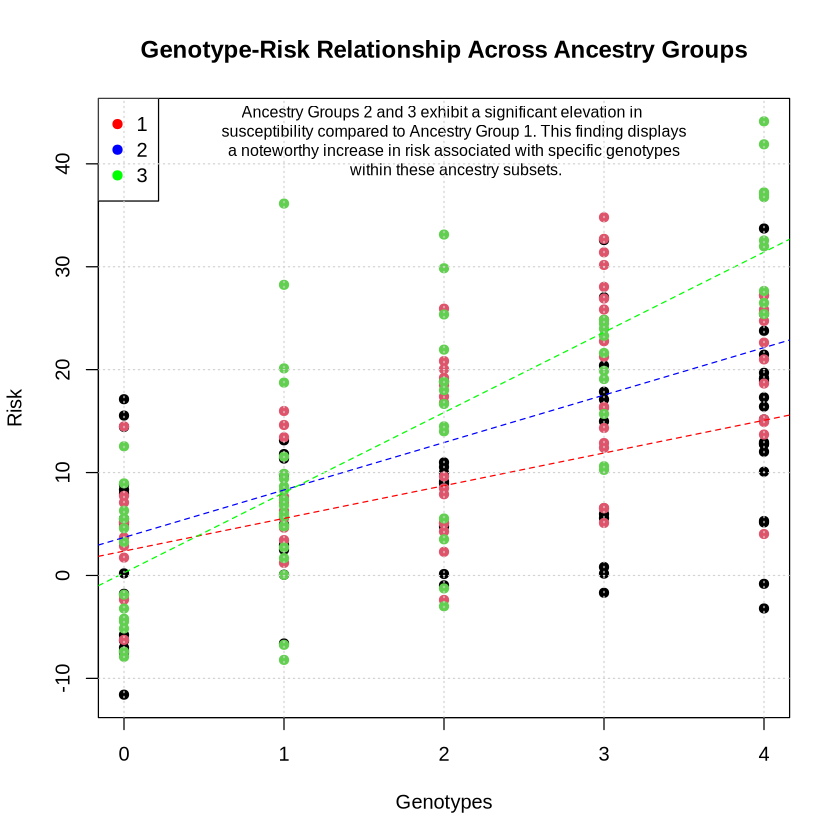

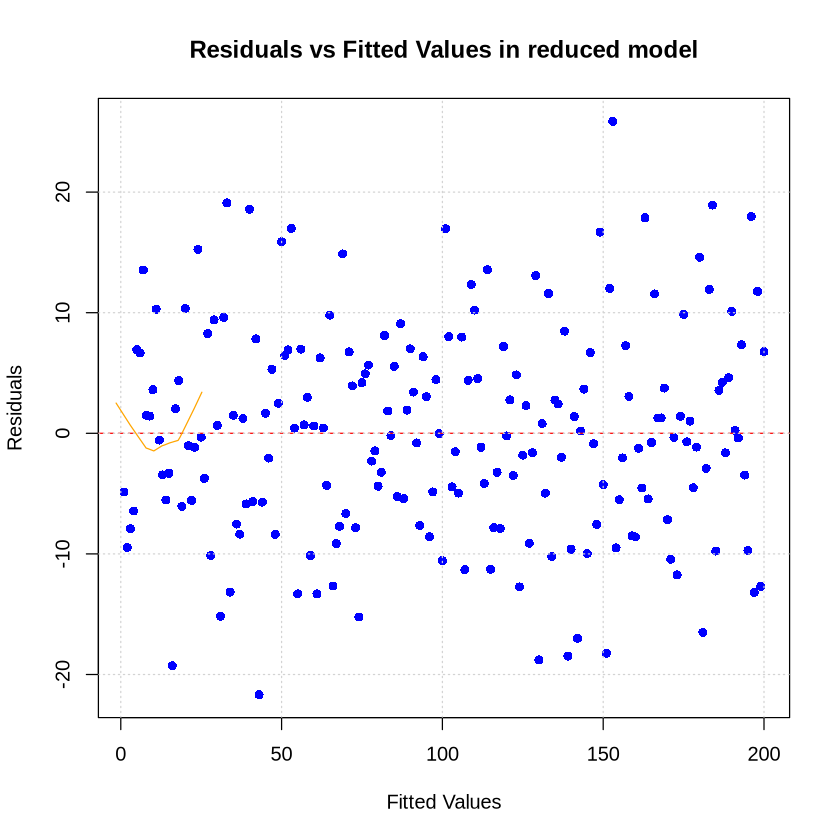

In [6]:
# Load the data
data <- read.csv("assignment.csv")

# Treat ancestry as a factor variable
data$ancestry <- as.factor(data$ancestry)

# Fit a full model
full_model <- lm(risk ~ genotypes + ancestry + income, data = data)

# Perform stepwise model selection based on AIC
reduced_model <- stepAIC(full_model, direction = "both")

# Summary of the reduced model
summary(reduced_model)

# Shapiro-Wilk test for normality of residuals in reduced model
shapiro_test <- shapiro.test(residuals(reduced_model))

# Print the test results
print(shapiro_test)

# Reporting Statement for Problem 3
cat("
Problem 3 Report Statement:

The analysis showed Genotypes as a highly significant predictor (p-value < 2e-16), emphasizing its substantial influence on susceptibility to the disease.  Ancestry was found to be significant factor that increases 
risk. Ancestry Groups 2 and 3 showing elevated risk (p = 0.00502 and p = 1.89e-05, respectively). Ancestry Group 3 shows the most substantial impact (p = 1.89e-05). The removal of income from the model resulted in 
a lower Akaike Information Criterion (AIC) of 875.35, suggesting an improved balance between model fit and complexity. With the exclusion of income, the lower model complexity and good fit indicates that income was 
not significant to explaining the vairability in the response variable.

Assumptions on the reduced model were done, including homoscedasticity and normality f residuals, were checked. A residuals vs fitted values plot displayed random scatter of points around the reference line at 0, 
supporting the assumption of homoscedasticity (stable variance) and the Shapiro-Wilks test has no evidence to reject the assumption of normality for the residuals as the p-value was greater than 0.05 (W = 0.99589,
p-value = 0.8699). In conclusion, the final model, comprising genotypes and ancestry, significantly explains the variation in disease risk. The notable impact of specific genotypes within different ancestry subsets 
provides crucial insights into susceptibility.
")

# Define colors for regression lines
line_colors <- c("red", "blue", "green", "purple", "orange")

# Scatterplot for genotypes
plot(data$genotypes, data$risk, main = "Genotype-Risk Relationship Across Ancestry Groups", xlab = "Genotypes", ylab = "Risk", pch = 19, col = as.integer(data$ancestry))

# Add regression lines for each level of ancestry
for (i in 1:length(levels(data$ancestry))) {
  subset_data <- subset(data, ancestry == levels(data$ancestry)[i])
  model <- lm(risk ~ genotypes, data = subset_data)
  abline(model, col = line_colors[i], lty = 2)
}

# Add legend
legend("topleft", legend = levels(data$ancestry), col = line_colors, pch = 19)

# Add annotation in the top center of the graph
mtext("Ancestry Groups 2 and 3 exhibit a significant elevation in 
      susceptibility compared to Ancestry Group 1. This finding displays 
      a noteworthy increase in risk associated with specific genotypes 
      within these ancestry subsets.", side = 3, line = -3.4, cex = 0.8)

# Add grid
grid()

# Check homoscedasticity with reduced model
plot(residuals(reduced_model), pch = 16, col = "blue", main = "Residuals vs Fitted Values in reduced model", xlab = "Fitted Values", ylab = "Residuals")
abline(h = 0, col = "red", lty = 2)
# Add grid
grid()

# Add a lowess smoother
lines(lowess(residuals(reduced_model) ~ fitted(reduced_model)), col = "orange")

__Problem 4__

Assume that the variable `income` is distributed as a mixture of Normal distributions. Specifically, its probability density function is modelled as $\alpha \mathcal{N}(\mu_1, (\mu_1/10)^2) + (1-\alpha) \mathcal{N}(\mu_2, (\mu_2/10)^2)$ with parameters $\alpha$, $\mu_1$, and $\mu_2$. In this mixture distribution, two Normal distributions with different means and variances are weighted by $\alpha$ and $1-\alpha$, respectively.

Calculate point estimates and confidence intervals (or other metrics of uncertainty) for each parameter. Choose a suitable statistical approach among the ones discussed in class.

In [ ]:
# Install knitr packages
install.packages("knitr")

In [7]:
# Load knitr library
library(knitr)

# Load data from csv file
data <- read.csv("assignment.csv")
data <- data$income

# Expectation-Maximization (EM) algorithm for a two-component normal mixture model
em_algorithm <- function(data, max_iter = 1000, tol = 1e-6) {
  n <- length(data)
  
  # Initial parameter guesses
  alpha <- 0.5
  mu1 <- mean(data) - sd(data)
  mu2 <- mean(data) + sd(data)
  sigma1 <- sd(data) / 10
  sigma2 <- sd(data) / 10
  
  for (iter in 1:max_iter) {
    # E-step
    gamma1 <- alpha * dnorm(data, mean = mu1, sd = sigma1)
    gamma2 <- (1 - alpha) * dnorm(data, mean = mu2, sd = sigma2)
    gamma_sum <- gamma1 + gamma2
    gamma1 <- gamma1 / gamma_sum
    gamma2 <- gamma2 / gamma_sum
    
    # M-step
    alpha <- mean(gamma1)
    mu1 <- sum(gamma1 * data) / sum(gamma1)
    mu2 <- sum(gamma2 * data) / sum(gamma2)
    sigma1 <- sqrt(sum(gamma1 * (data - mu1)^2) / sum(gamma1))
    sigma2 <- sqrt(sum(gamma2 * (data - mu2)^2) / sum(gamma2))
    
    # Check for convergence
    if (max(abs(c(alpha, mu1, mu2, sigma1, sigma2) - c(alpha, mu1, mu2, sigma1, sigma2))) < tol) {
      break
    }
  }
  
  # Return parameters
  return(list(alpha = alpha, mu1 = mu1, mu2 = mu2, sigma1 = sigma1, sigma2 = sigma2))
}

# Bootstrap function to calculate confidence intervals
bootstrap_ci <- function(data, fun, n_sims = 1000, alpha = 0.975) {
  n <- length(data)
  sims <- replicate(n_sims, {
    indices <- sample(1:n, replace = TRUE)
    sampled_data <- data[indices]
    result <- fun(sampled_data)
    return(result)
  })
  
  lower <- quantile(sims, (1 - alpha) / 2)
  upper <- quantile(sims, 1 - (1 - alpha) / 2)
  
  return(c(lower, upper))
}

# Fit the mixture model using EM algorithm
result <- em_algorithm(data)

# Bootstrap for confidence intervals
n_sims <- 1000
alpha_ci <- bootstrap_ci(data, function(data) em_algorithm(data)$alpha, n_sims)
mu1_ci <- bootstrap_ci(data, function(data) em_algorithm(data)$mu1, n_sims)
mu2_ci <- bootstrap_ci(data, function(data) em_algorithm(data)$mu2, n_sims)
sigma1_ci <- bootstrap_ci(data, function(data) em_algorithm(data)$sigma1, n_sims)
sigma2_ci <- bootstrap_ci(data, function(data) em_algorithm(data)$sigma2, n_sims)

# Create a table 
table_data <- data.frame(
  Parameter = c("alpha", "mu1", "mu2", "sigma1", "sigma2"),
  Estimate = c(result$alpha, result$mu1, result$mu2, result$sigma1, result$sigma2),
  Lower_CI_2.5 = c(alpha_ci[1], mu1_ci[1], mu2_ci[1], sigma1_ci[1], sigma2_ci[1]),
  Upper_CI_97.5 = c(alpha_ci[2], mu1_ci[2], mu2_ci[2], sigma1_ci[2], sigma2_ci[2])
)
                          
# Print the table
kable(table_data, format.args = list(decimal = ".", big.mark = ",", scientific = FALSE))                          



|Parameter |  Estimate| Lower_CI_2.5| Upper_CI_97.5|
|:---------|---------:|------------:|-------------:|
|alpha     |  0.604767|    0.5354711|     0.6675324|
|mu1       | 30.125190|   29.4596048|    30.8699067|
|mu2       | 49.801005|   48.3035797|    50.9096036|
|sigma1    |  3.083227|    2.6812475|     3.4807119|
|sigma2    |  4.811988|    4.0157274|     5.8460538|